In [20]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

In [21]:
mnist_path="../mnist_data/"

In [23]:
def load_mnist(path):
    #path:mnist data path
    mnist=fetch_openml('mnist_784',data_home=path)
    image=mnist['data']#shape:(70000,784)
    image=image/255
    label=mnist['target']#shape:(70000,)
    return image,label

In [24]:
image,label=load_mnist(mnist_path)
train_image=image[:60000,:]
test_image=image[60000:,:]
train_label=label[:60000]
test_label=label[60000:]

In [25]:
model = LogisticRegression(max_iter=1000)
print(model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
model.fit(train_image, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predict_label=model.predict(test_image)

In [29]:
result_matrix=np.zeros((10,10))
for i in range(len(predict_label)):
    x=int(test_label[i])-1
    y=int(predict_label[i])-1
    result_matrix[x,y]=result_matrix[x,y]+1
precision=np.zeros(10)
recall=np.zeros(10)
for i in range(10):
    precision[i]=result_matrix[i,i]/sum(result_matrix[:,i])
    recall[i]=result_matrix[i,i]/sum(result_matrix[i,:])
print(precision)
print(recall)

[0.96187175 0.92907093 0.90420332 0.93692777 0.89516129 0.94312306
 0.93208661 0.88053553 0.91034483 0.95309381]
[0.97797357 0.90116279 0.91584158 0.93788187 0.87107623 0.9519833
 0.92120623 0.87782341 0.91575818 0.9744898 ]


0.9256


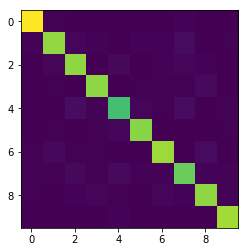

In [30]:
plt.imshow(result_matrix/10000)
print(model.score(test_image,test_label))